In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import splrep,splint,splev,BSpline,sproot,splprep,bisplrep,bisplev
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit as cfit
from scipy.interpolate import RectBivariateSpline
import scipy
from tqdm import tqdm
%matplotlib inline

In [2]:

T1=np.array([105.,209.,310.,411.,517.,620.,730.,837.,926.])
R1=np.array([814.,518.,326.,224.,118.,72.,63.,45.,22.])
N1=np.array([5812.,10911.,14038.,15911.,17358.,18130.,18672.,19059.,19304.])

T2=np.array([106.,211.,306.,405.,522.,620.,722.,833.,919.])
R2=np.array([840.,490.,353.,217.,118.,85.,46.,31.,21.])
N2=np.array([6721.,11784.,14712.,16866.,18645.,19094.,19651.,20044.,20268.])

T3=np.array([104.,208.,311.,417.,522.,624.,728.,834.,938.])
R3=np.array([1213.,704.,481.,303.,201.,133.,94.,50.,36.])
N3=np.array([8476.,16824.,21008.,24332.,26209.,27364.,28075.,28647.,29017.])


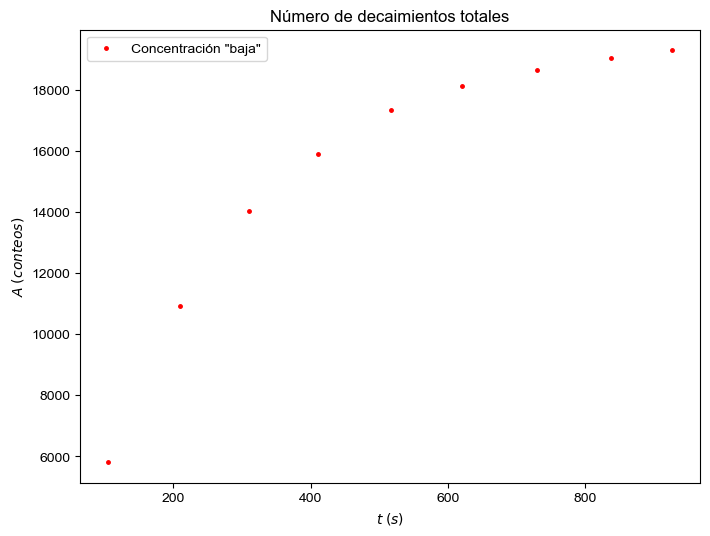

In [3]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(T1,N1,s=25,color='r',marker='.')
plt.legend(['Concentración "baja"'])
plt.title('Número de decaimientos totales')
plt.ylabel('$A \; (conteos) $')
plt.xlabel('$t \; (s)$')
plt.style.use('seaborn-whitegrid')
plt.show()

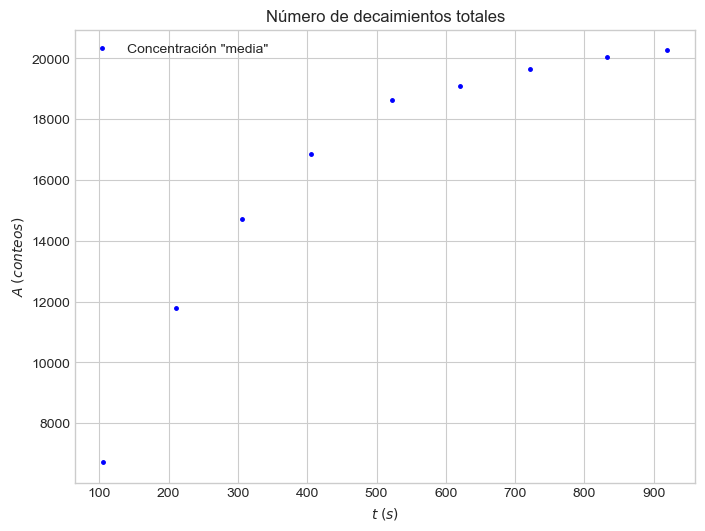

In [4]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(T2,N2,s=25,color='b',marker='.')
plt.legend(['Concentración "media"' ])
plt.title('Número de decaimientos totales')
plt.ylabel('$A \; (conteos) $')
plt.xlabel('$t \; (s)$')
plt.style.use('seaborn-whitegrid')
plt.show()

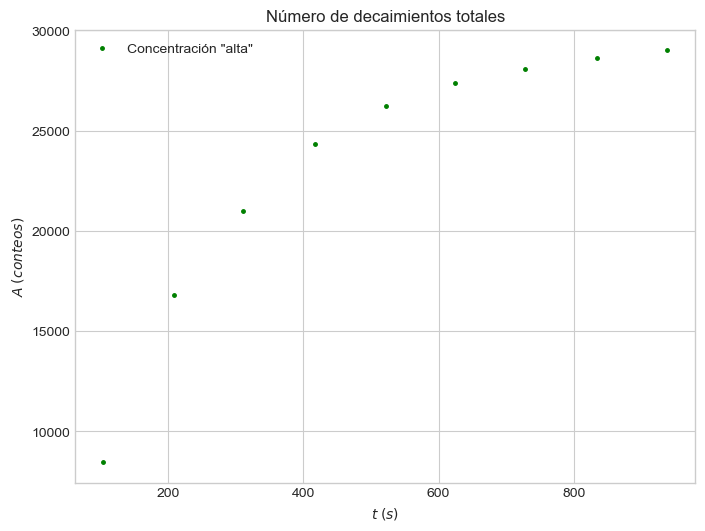

In [5]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(T3,N3,s=25,color='g',marker='.')
plt.legend(['Concentración "alta"'])
plt.title('Número de decaimientos totales')
plt.ylabel('$A \; (conteos) $')
plt.xlabel('$t \; (s)$')
plt.style.use('seaborn-whitegrid')
plt.show()

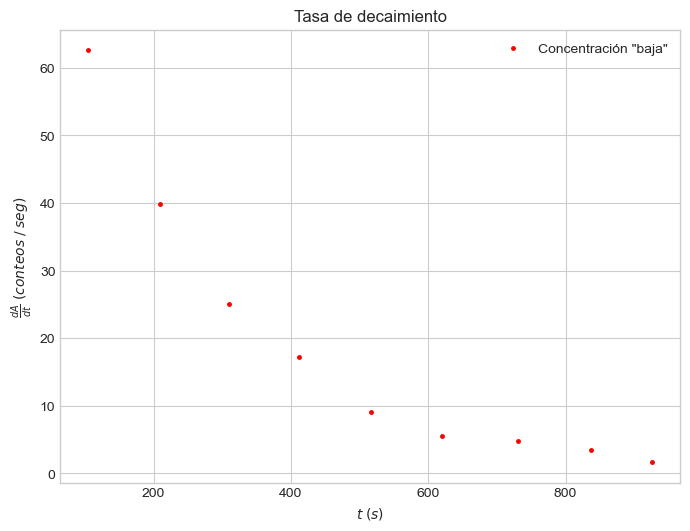

In [6]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(T1,R1 / 13,s=25,color='r',marker='.')
plt.legend(['Concentración "baja"'])
plt.title('Tasa de decaimiento')
plt.ylabel(r'$\frac{dA}{dt} \; (conteos \; / \;  seg)$')
plt.xlabel('$t\; (s)$')
plt.style.use('seaborn-whitegrid')
plt.show()

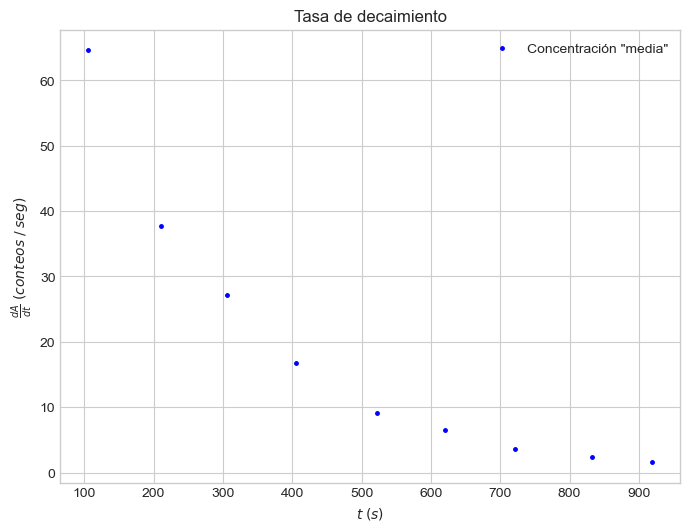

In [7]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(T2,R2/13, s=25,color='b',marker='.')
plt.legend(['Concentración "media"'])
plt.title('Tasa de decaimiento')
plt.ylabel(r'$\frac{dA}{dt} \; (conteos \; / \;  seg)$')
plt.xlabel('$t\; (s)$')
plt.style.use('seaborn-whitegrid')
plt.show()

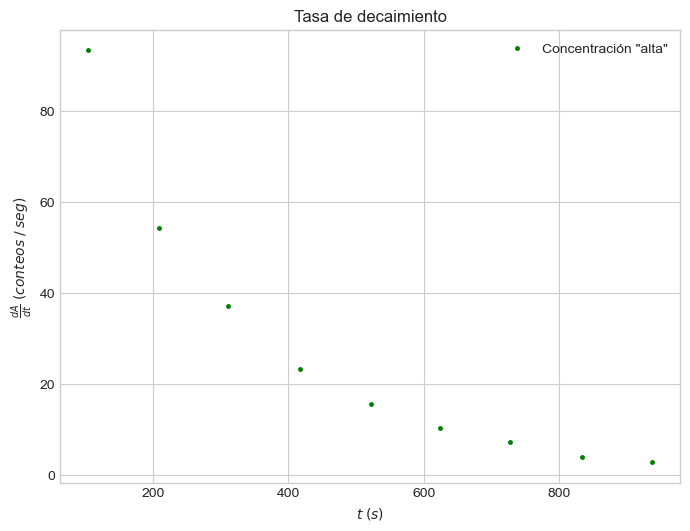

In [8]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(T3,R3 / 13,s=25,color='g',marker='.')
plt.legend(['Concentración "alta"'])
plt.title('Tasa de decaimiento')
plt.ylabel(r'$\frac{dA}{dt} \; (conteos \; / \;  seg)$')
plt.xlabel('$t\; (s)$')
plt.style.use('seaborn-whitegrid')
plt.show()

In [9]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings
def func(x, a, b): # Sigmoid A With Offset from zunzun.com
    return   a*(1-np.exp(-b*x))

# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)

def generate_Initial_Parameters():
    param = np.array([0, 0.005])
    return param


In [23]:
xData = T1
yData= N1

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData,geneticParameters)

print('Parameters', fittedParameters)


modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)
A,B = fittedParameters[0], fittedParameters[1]

def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.scatter(xData, yData,s=25,color='r',marker='.')

    # create data for the fitted equation plot
    xModel = numpy.linspace(0, max(xData)*1.05)
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel,   linewidth = 0.5, color = 'k')

    axes.set_xlabel(r'$t \; (s)$') # X axis data label
    axes.set_ylabel(r'$A \; (conteos)$') # Y axis data label
    axes.legend([r'$A(t) = N_{0}(1-e^{-\lambda t})$','Datos concentración "baja"'])
    axes.set_title('Número de decaimientos totales')
    axes.set_xlim(0,max(xData)*1.05)
    axes.set_ylim(0,max(yData)*1.05)
    plt.show()
    plt.close('all') # clean up after using pyplot
plt.style.use('seaborn-whitegrid')
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
print(A,B)

<ipython-input-16-3cb731ad91a8>:7: RuntimeWarning: overflow encountered in exp
  return  b*a*np.exp(-b*x)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

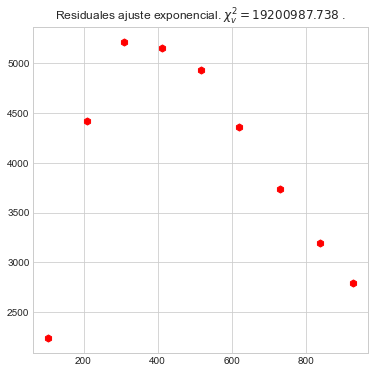

In [11]:
f=plt.figure(figsize=(6,6))
chis=sum((N1-func(T1,A,B))**2)/(len(T1)-1)
ax2 = f.add_subplot(111,title="Residuales ajuste exponencial. $\chi_v^2 ={0:0.3f}$ .".format(chis))
ax2.scatter(T1,N1-func(T1,A,B),s=50,marker="h",color= 'r')

<ipython-input-9-f753c0e6fbfd>:7: RuntimeWarning: overflow encountered in exp
  return   a*(1-np.exp(-b*x))


Parameters [2.09580925e+04 3.93087591e-03]
RMSE: 208.74207407768387
R-squared: 0.9977099556642661


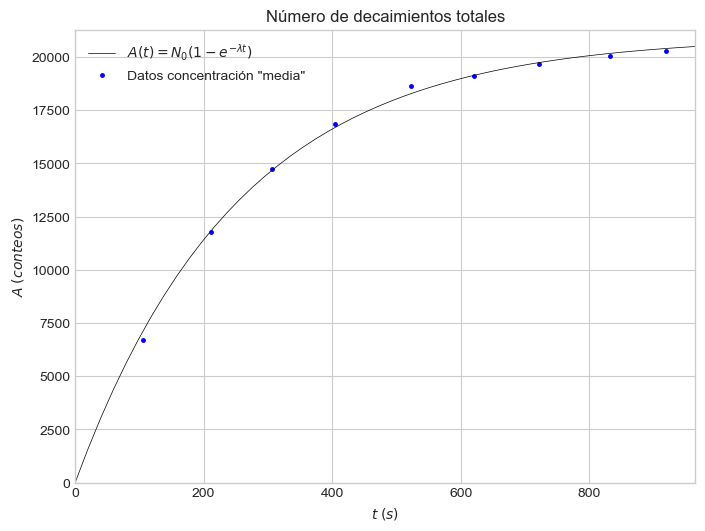

20958.09251006805 0.003930875907702346


In [12]:
xData = T2
yData= N2

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData,geneticParameters)

print('Parameters', fittedParameters)


modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)
A,B = fittedParameters[0], fittedParameters[1]

def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.scatter(xData, yData,s=25,color='b',marker='.')

    # create data for the fitted equation plot
    xModel = numpy.linspace(0, max(xData)*1.05)
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel,   linewidth = 0.5, color = 'k')

    axes.set_xlabel(r'$t \; (s)$') # X axis data label
    axes.set_ylabel(r'$A \; (conteos)$') # Y axis data label
    axes.legend([r'$A(t) = N_{0}(1-e^{-\lambda t})$','Datos concentración "media"'])
    axes.set_title('Número de decaimientos totales')
    axes.set_xlim(0,max(xData)*1.05)
    axes.set_ylim(0,max(yData)*1.05)
    plt.show()
    plt.close('all') # clean up after using pyplot
plt.style.use('seaborn-whitegrid')
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
print(A,B)

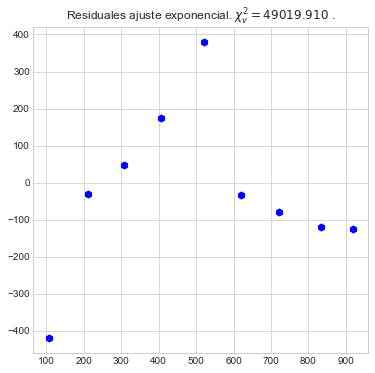

In [13]:
f=plt.figure(figsize=(6,6))
chis=sum((N2-func(T2,A,B))**2)/(len(T2)-1)
ax2 = f.add_subplot(111,title="Residuales ajuste exponencial. $\chi_v^2 ={0:0.3f}$ .".format(chis))
ax2.scatter(T2,N2-func(T2,A,B),s=50,marker="h",color= 'b')

<ipython-input-9-f753c0e6fbfd>:7: RuntimeWarning: overflow encountered in exp
  return   a*(1-np.exp(-b*x))


Parameters [3.01074894e+04 3.79190642e-03]
RMSE: 507.9526784067473
R-squared: 0.9939349150788201


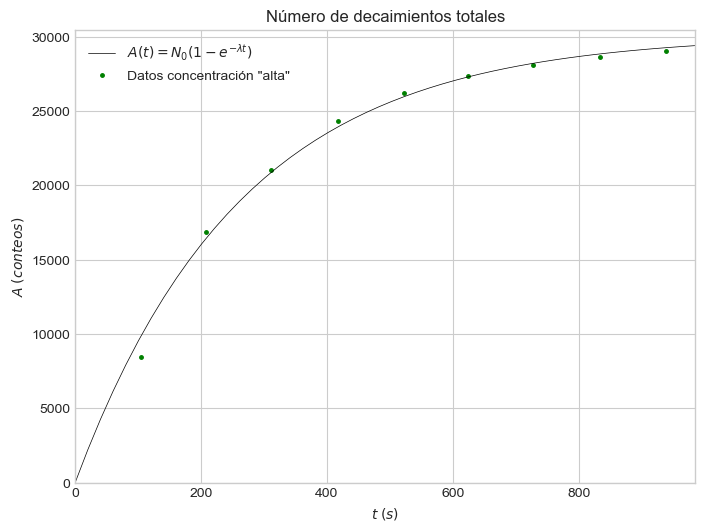

30107.489351260603 0.003791906424464485


In [14]:
xData = T3
yData= N3

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData,geneticParameters)

print('Parameters', fittedParameters)


modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)
A,B = fittedParameters[0], fittedParameters[1]

##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.scatter(xData, yData,s=25,color='g',marker='.')

    # create data for the fitted equation plot
    xModel = numpy.linspace(0, max(xData)*1.05)
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel,   linewidth = 0.5, color = 'k')

    axes.set_xlabel(r'$t \; (s)$') # X axis data label
    axes.set_ylabel(r'$A \; (conteos)$') # Y axis data label
    axes.legend([r'$A(t) = N_{0}(1-e^{-\lambda t})$','Datos concentración "alta"'])
    axes.set_title('Número de decaimientos totales')
    axes.set_xlim(0,max(xData)*1.05)
    axes.set_ylim(0,max(yData)*1.05)
    plt.show()
    plt.close('all') # clean up after using pyplot
plt.style.use('seaborn-whitegrid')
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
print(A,B)

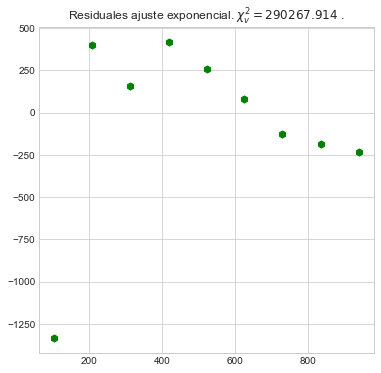

In [15]:
f=plt.figure(figsize=(6,6))
chis=sum((N3-func(T3,A,B))**2)/(len(T3)-1)
ax2 = f.add_subplot(111,title="Residuales ajuste exponencial. $\chi_v^2 ={0:0.3f}$ .".format(chis))
ax2.scatter(T3,N3-func(T3,A,B),s=50,marker="h",color= 'g')

In [16]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings
def func(x, a, b): # Sigmoid A With Offset from zunzun.com
    return  b*a*np.exp(-b*x)

# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)

def generate_Initial_Parameters():
    param = np.array([xData[0], 0.005])
    return param


Parameters [2.25926544e+04 4.40651134e-03]
RMSE: 0.7371584333547869
R-squared: 0.9985705134649482


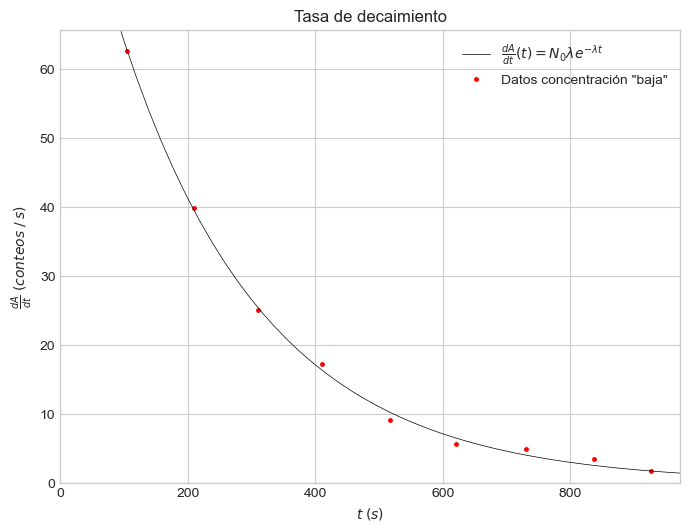

22592.65435638159 0.004406511335477066


In [17]:
xData = T1
yData= R1/13

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData,geneticParameters)

print('Parameters', fittedParameters)


modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)
A,B = fittedParameters[0], fittedParameters[1]

##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.scatter(xData, yData,s=25,color='r',marker='.')

    # create data for the fitted equation plot
    xModel = numpy.linspace(0, max(xData)*1.05)
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel,   linewidth = 0.5, color = 'k')

    axes.set_xlabel(r'$t \; (s)$') # X axis data label
    axes.set_ylabel(r'$ \frac{dA}{dt} \; (conteos \; / \;s)$') # Y axis data label
    axes.legend([r'$\frac{dA}{dt} (t) = N_{0}\lambda e^{-\lambda t}$','Datos concentración "baja"'])
    axes.set_title('Tasa de decaimiento')
    axes.set_xlim(0,max(xData)*1.05)
    axes.set_ylim(0,max(yData)*1.05)
    plt.show()
    plt.close('all') # clean up after using pyplot
plt.style.use('seaborn-whitegrid')
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
print(A, B)


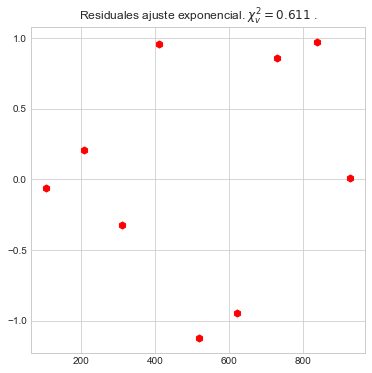

In [18]:
f=plt.figure(figsize=(6,6))
chis=sum((R1/13-func(T1,A,B))**2)/(len(T1)-1)
ax2 = f.add_subplot(111,title="Residuales ajuste exponencial. $\chi_v^2 ={0:0.3f}$ .".format(chis))
ax2.scatter(T1,R1/13-func(T1,A,B),s=50,marker="h",color= 'r')

Parameters [2.27508921e+04 4.56857338e-03]
RMSE: 0.8776899900601967
R-squared: 0.9980607186962089


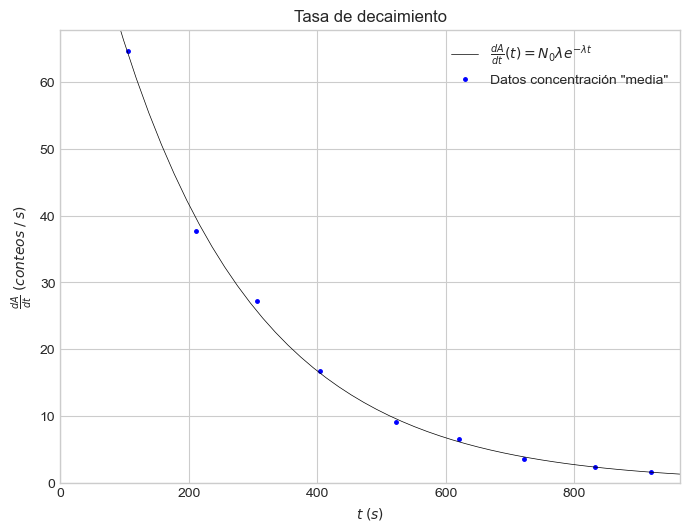

22750.89206718617 0.004568573378641374


In [19]:
xData = T2
yData= R2/13

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData,geneticParameters)

print('Parameters', fittedParameters)


modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)
A,B = fittedParameters[0], fittedParameters[1]

##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.scatter(xData, yData,s=25,color='b',marker='.')

    # create data for the fitted equation plot
    xModel = numpy.linspace(0, max(xData)*1.05)
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel,   linewidth = 0.5, color = 'k')

    axes.set_xlabel(r'$t \; (s)$') # X axis data label
    axes.set_ylabel(r'$ \frac{dA}{dt} \; (conteos \; /  \;s)$') # Y axis data label
    axes.legend([r'$\frac{dA}{dt}(t) = N_{0}\lambda e^{-\lambda t}$','Datos concentración "media"'])
    axes.set_title('Tasa de decaimiento')
    axes.set_xlim(0,max(xData)*1.05)
    axes.set_ylim(0,max(yData)*1.05)
    plt.show()
    plt.close('all') # clean up after using pyplot
plt.style.use('seaborn-whitegrid')
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
print(A, B)


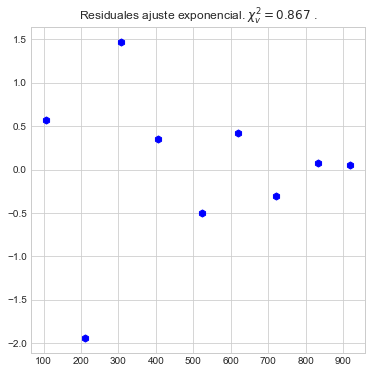

In [20]:
f=plt.figure(figsize=(6,6))
chis=sum((R2/13-func(T2,A,B))**2)/(len(T2)-1)
ax2 = f.add_subplot(111,title="Residuales ajuste exponencial. $\chi_v^2 ={0:0.3f}$ .".format(chis))
ax2.scatter(T2,R2/13-func(T2,A,B),s=50,marker="h",color= 'b')

Parameters [3.28165425e+04 4.41619917e-03]
RMSE: 1.5329218235689284
R-squared: 0.997173812683071


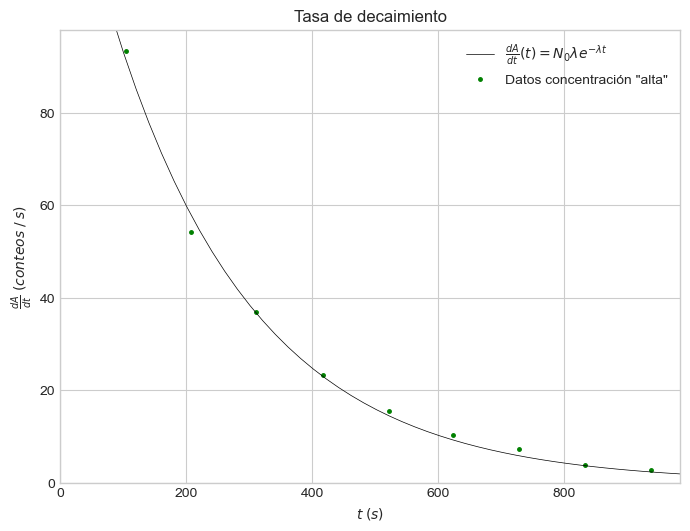

32816.542536291236 0.004416199171070745


In [21]:
xData = T3
yData= R3/13

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData,geneticParameters)

print('Parameters', fittedParameters)


modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)
A,B = fittedParameters[0], fittedParameters[1]

##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.scatter(xData, yData,s=25,color='g',marker='.')

    # create data for the fitted equation plot
    xModel = numpy.linspace(0, max(xData)*1.05)
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel,   linewidth = 0.5, color = 'k')

    axes.set_xlabel(r'$t \; (s)$') # X axis data label
    axes.set_ylabel(r'$ \frac{dA}{dt} \; (conteos \; / \;s)$') # Y axis data label
    axes.legend([r'$ \frac{dA}{dt} (t) = N_{0}\lambda e^{-\lambda t}$','Datos concentración "alta"'])
    axes.set_title('Tasa de decaimiento')
    axes.set_xlim(0,max(xData)*1.05)
    axes.set_ylim(0,max(yData)*1.05)
    plt.show()
    plt.close('all') # clean up after using pyplot
plt.style.use('seaborn-whitegrid')
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
print(A, B)


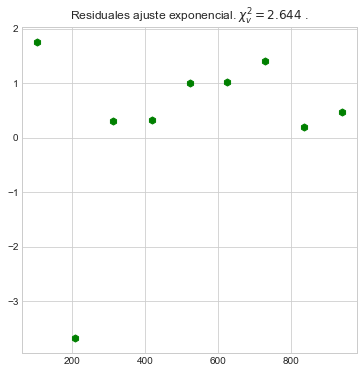

In [22]:
f=plt.figure(figsize=(6,6))
chis=sum((R3/13-func(T3,A,B))**2)/(len(T3)-1)
ax2 = f.add_subplot(111,title="Residuales ajuste exponencial. $\chi_v^2 ={0:0.3f}$ .".format(chis))
ax2.scatter(T3,R3/13-func(T3,A,B),s=50,marker="h",color= 'g')